In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import glob
import pyart
import cmweather
import itertools
import numpy as np
import pandas as pd
import xarray as xr
import xradar as xd
import radarx as rx
import cartopy.crs as ccrs
import cartopy.feature as feat
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
radar_files = sorted(glob.glob("../Radar_Data/CFRADIAL1_06June19/*"))
len(radar_files)

49

In [4]:
# dtree = xd.io.open_cfradial1_datatree(radar_files[0])

In [5]:
# def grid_radar(vol, range=200000, max_height=8000, hres=500, vres=100):
#     ds = vol.radarx.to_grid(
#         data_vars=["DBZ", "RHOHV", "ZDR"],
#         pseudo_cappi=True,
#         x_lim=(-range, range),
#         y_lim=(-range, range),
#         z_lim=(0, max_height),
#         x_step=hres,
#         y_step=hres,
#         z_step=vres,
#         x_smth=1,
#         y_smth=1,
#         z_smth=2,
#     )
#     return ds

In [6]:
# ds = grid_radar(dtree)

In [58]:
radar = pyart.io.read_cfradial(radar_files[0])

In [59]:
rdisplay = pyart.graph.RadarMapDisplay(radar)

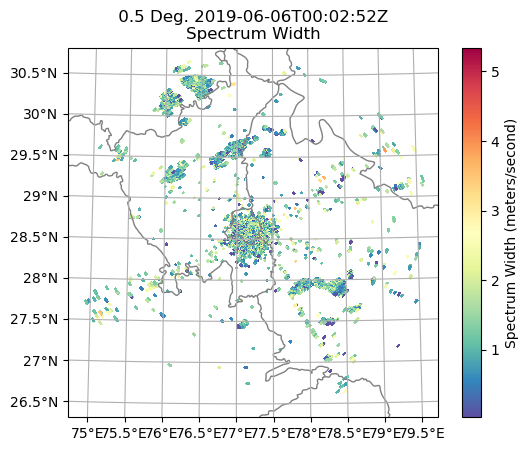

In [63]:
rdisplay.plot_ppi_map('WIDTH', resolution='10m',
                      lon_lines=np.arange(70, 80, 0.5),
                      lat_lines=np.arange(20, 40, 0.5))

In [62]:
radar.fields.keys()

dict_keys(['DBT', 'DBZ', 'VEL', 'WIDTH', 'ZDR', 'KDP', 'PHIDP', 'SQI', 'RHOHV', 'HCLASS'])

In [7]:
import sounderpy as spy


## ---------------------------------- SOUNDERPY ----------------------------------- ##
##          Vertical Profile Data Retrieval and Analysis Tool For Python            ##
##                      v3.0.8 | Jan 2025 | (C) Kyle J Gillett                      ##
##                 Docs: https://kylejgillett.github.io/sounderpy/                  ##
## --------------------- THANK YOU FOR USING THIS PACKAGE! ------------------------ ##



In [8]:
# VIDP, VIDD Delhi

In [9]:
clean_data = spy.get_obs_data('VIDD', '2019', '06', '06', '00')

> OBSERVED DATA ACCESS FUNCTION
  -----------------------------------
    > PROFILE FOUND: VIDD on 06/06/2019 at 00z | From UW
    > COMPLETE --------
    > RUNTIME: 00:00:02
    > SUMMARY: 00Z Launch for VIDD, DELHI/SAFDARJUNG at 06-06-2019-00Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 638.3 | MUCAPE: 638.3 | MLCAPE: 410.3 | MUECAPE: 334.6
    --- MU 0-3: 0.0 | MU 0-6: 281.2 | SB 0-3: 0.0 | SB 0-6: 281.2
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 11.9 knot | 0-500 SWV: 0.006 | 0-500 SHEAR: 9.7 | 0-500 SRH: 10.0
    --- 1-3km SRW: 17.9 knot | 1-3km SWV: 0.001 | 1-3km SHEAR: 4.4 | | 1-3km SRH: 9.3
 


> SOUNDING PLOTTER FUNCTION
  ---------------------------------
- no radar data available -


    > COMPLETE --------
    > RUNTIME: 00:00:07


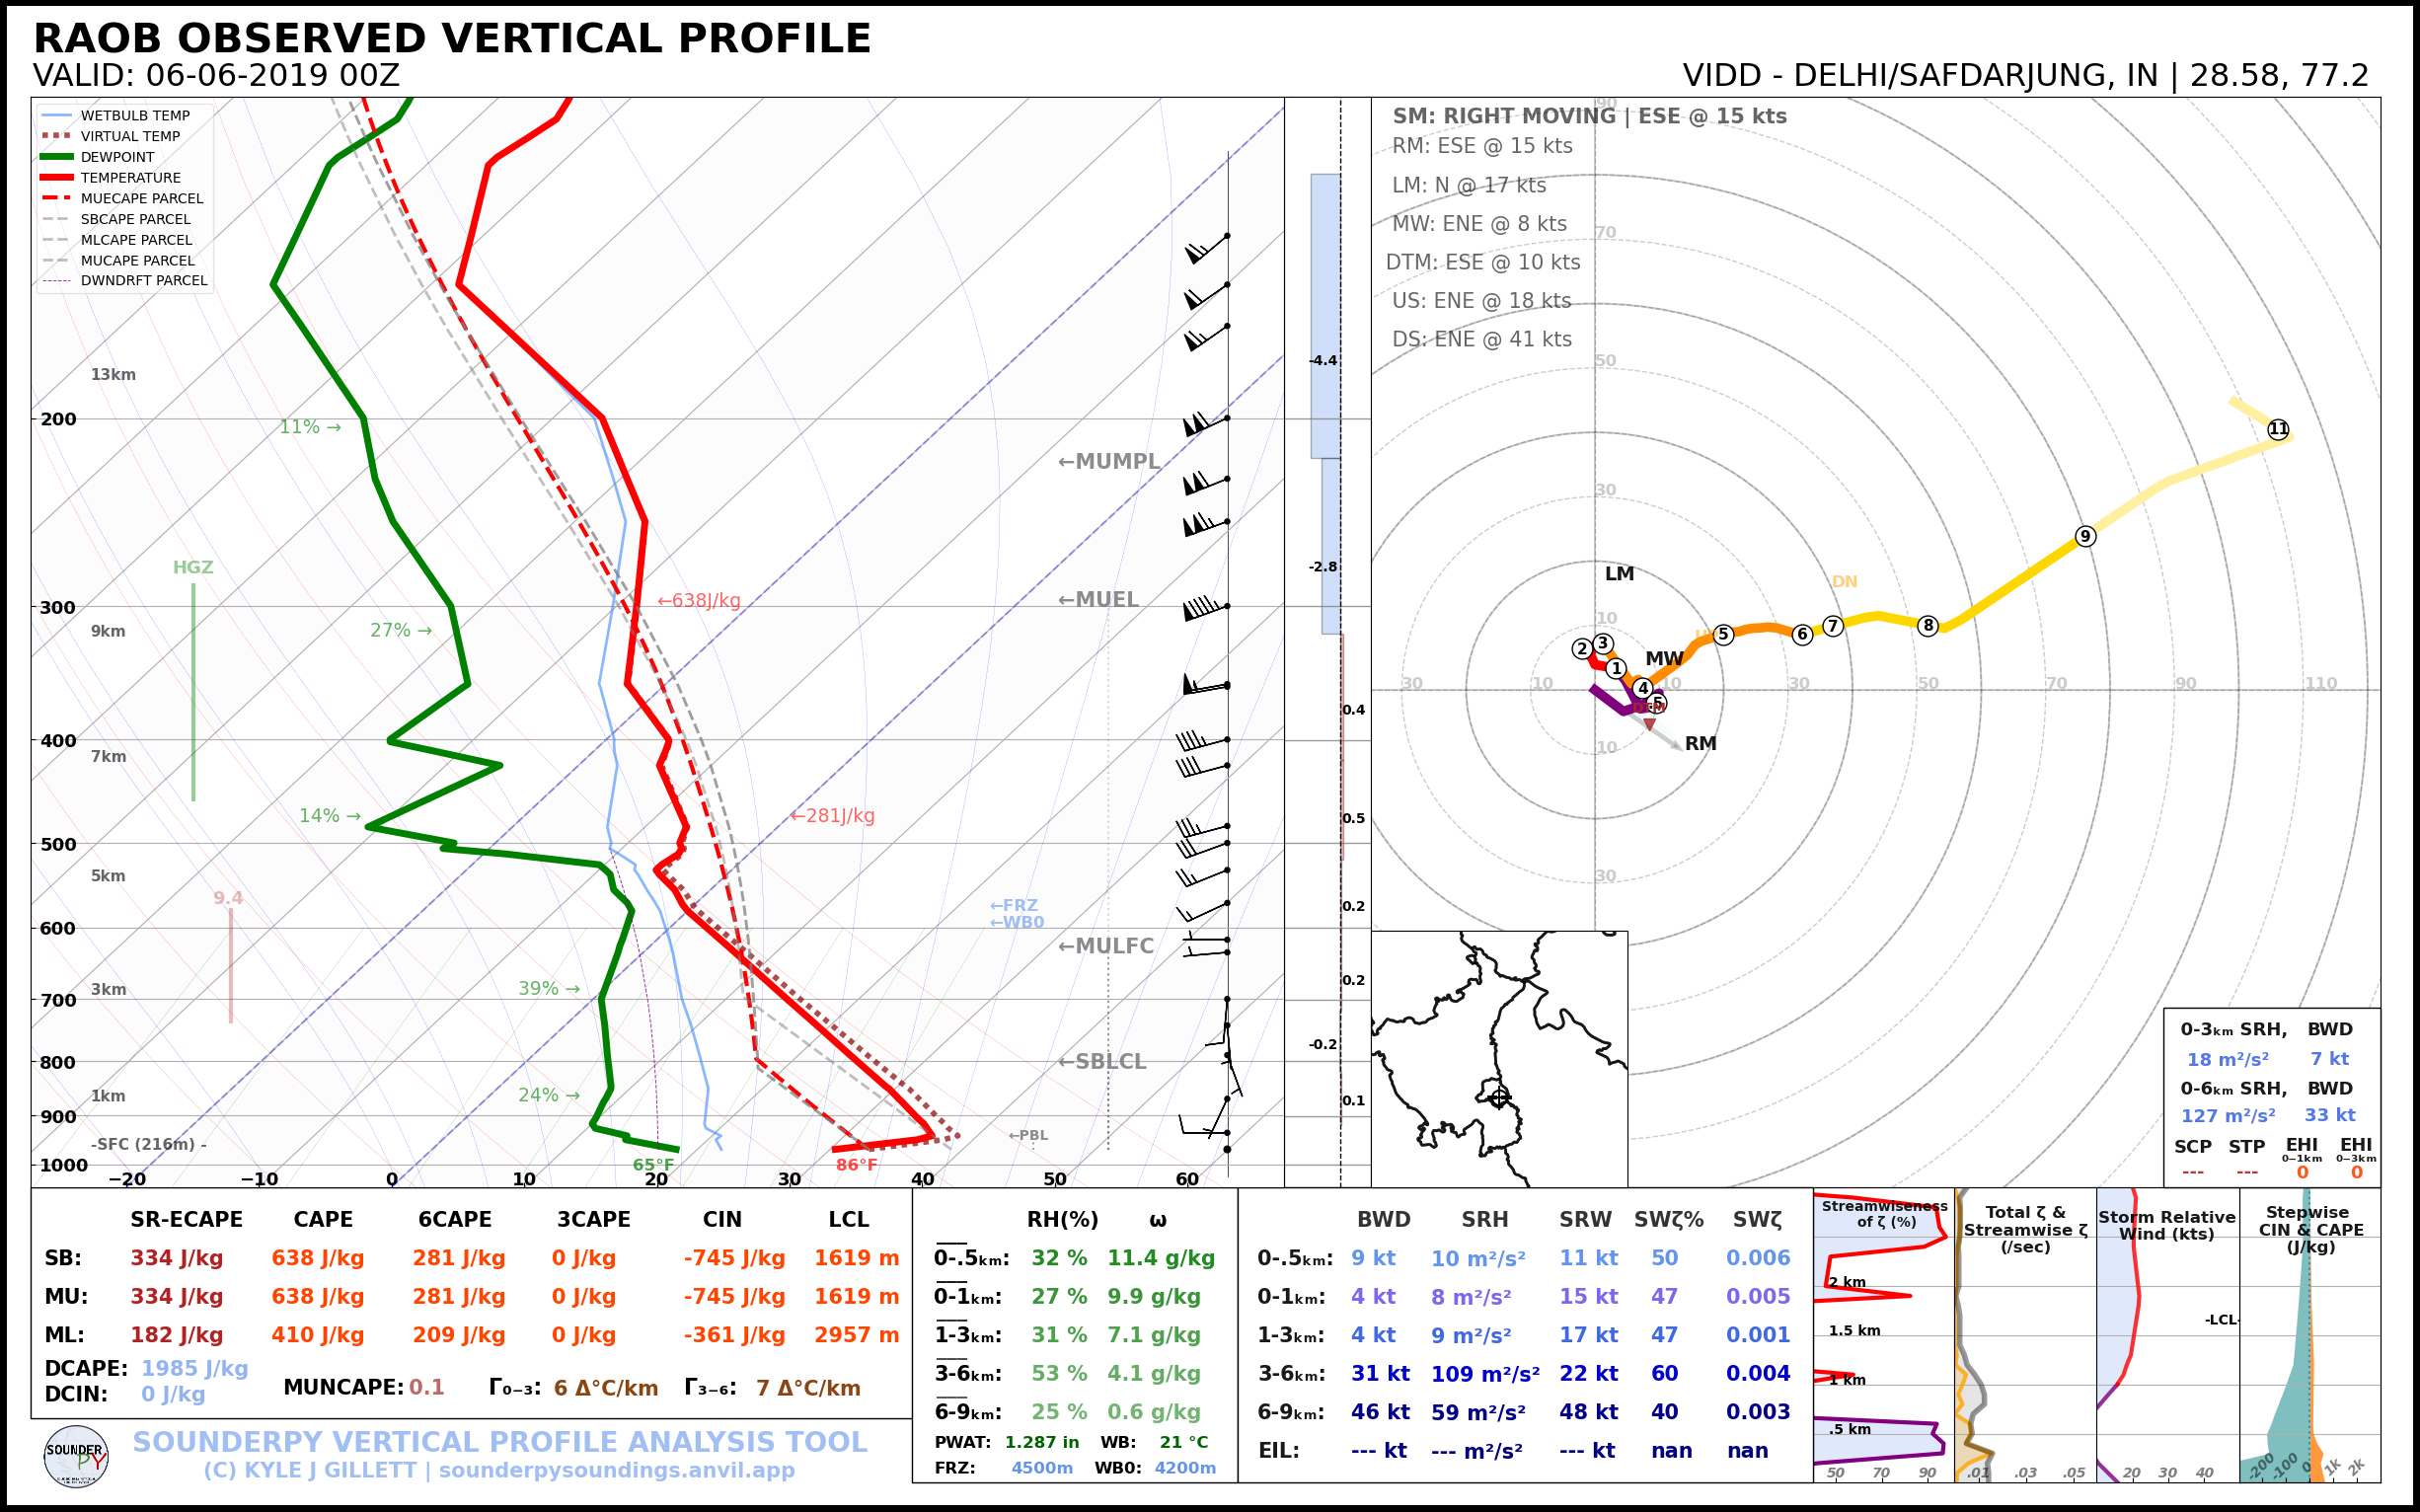

In [10]:
spy.build_sounding(clean_data)

In [11]:
site_lat_lon = clean_data['site_info']['site-latlon']
site_lat_lon

[28.58, 77.2]

In [12]:
time = clean_data['site_info']['valid-time']
time

['2019', '06', '06', '00']

In [14]:
era5 = spy.get_model_data('era5',site_lat_lon, "2019", "06", "06", "00")

> ERA5 REANALYSIS DATA ACCESS FUNCTION
  ------------------------------------------
    > some messages from ECMWF CDS...


2025-04-16 17:26:37,927 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-16 17:26:37,930 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-04-16 17:26:38,486 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-16 17:26:38,494 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter nam

    > DATASET ACCESSED: reanalysis-era5-pressure-levels


2025-04-16 17:27:02,708 INFO Request ID is 5ef346dc-d9f8-4e07-a54d-88c2ded06f49
INFO:datapi.legacy_api_client:Request ID is 5ef346dc-d9f8-4e07-a54d-88c2ded06f49
2025-04-16 17:27:03,192 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-04-16 17:27:17,473 INFO status has been updated to successful
INFO:datapi.legacy_api_client:status has been updated to successful
INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2025-04-16/6507a97a360731c5c3d3c04fa3f74d01.nc


    > DATASET ACCESSED: reanalysis-era5-single-levels


6507a97a360731c5c3d3c04fa3f74d01.nc:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2025-04-16/aa522e3f19c1fb4781af2cfce9a9fcff.nc


aa522e3f19c1fb4781af2cfce9a9fcff.nc:   0%|          | 0.00/78.9k [00:00<?, ?B/s]

    > COMPLETE --------
    > RUNTIME: 00:00:44
    > SUMMARY: 00Z ERA5 F00 for[28.58, 77.2] at 06-06-2019-00Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 4074.0 | MUCAPE: 4074.0 | MLCAPE: 1972.4 | MUECAPE: 2206.7
    --- MU 0-3: 33.1 | MU 0-6: 901.7 | SB 0-3: 33.1 | SB 0-6: 901.7
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 17.3 knot | 0-500 SWV: 0.009 | 0-500 SHEAR: 6.3 | 0-500 SRH: 28.7
    --- 1-3km SRW: 17.9 knot | 1-3km SWV: 0.001 | 1-3km SHEAR: 1.7 | | 1-3km SRH: 6.5
 


> COMPOSITE SOUNDING FUNCTION
  -------------------------------


> COMPLETE --------
> RUNTIME: 00:00:00


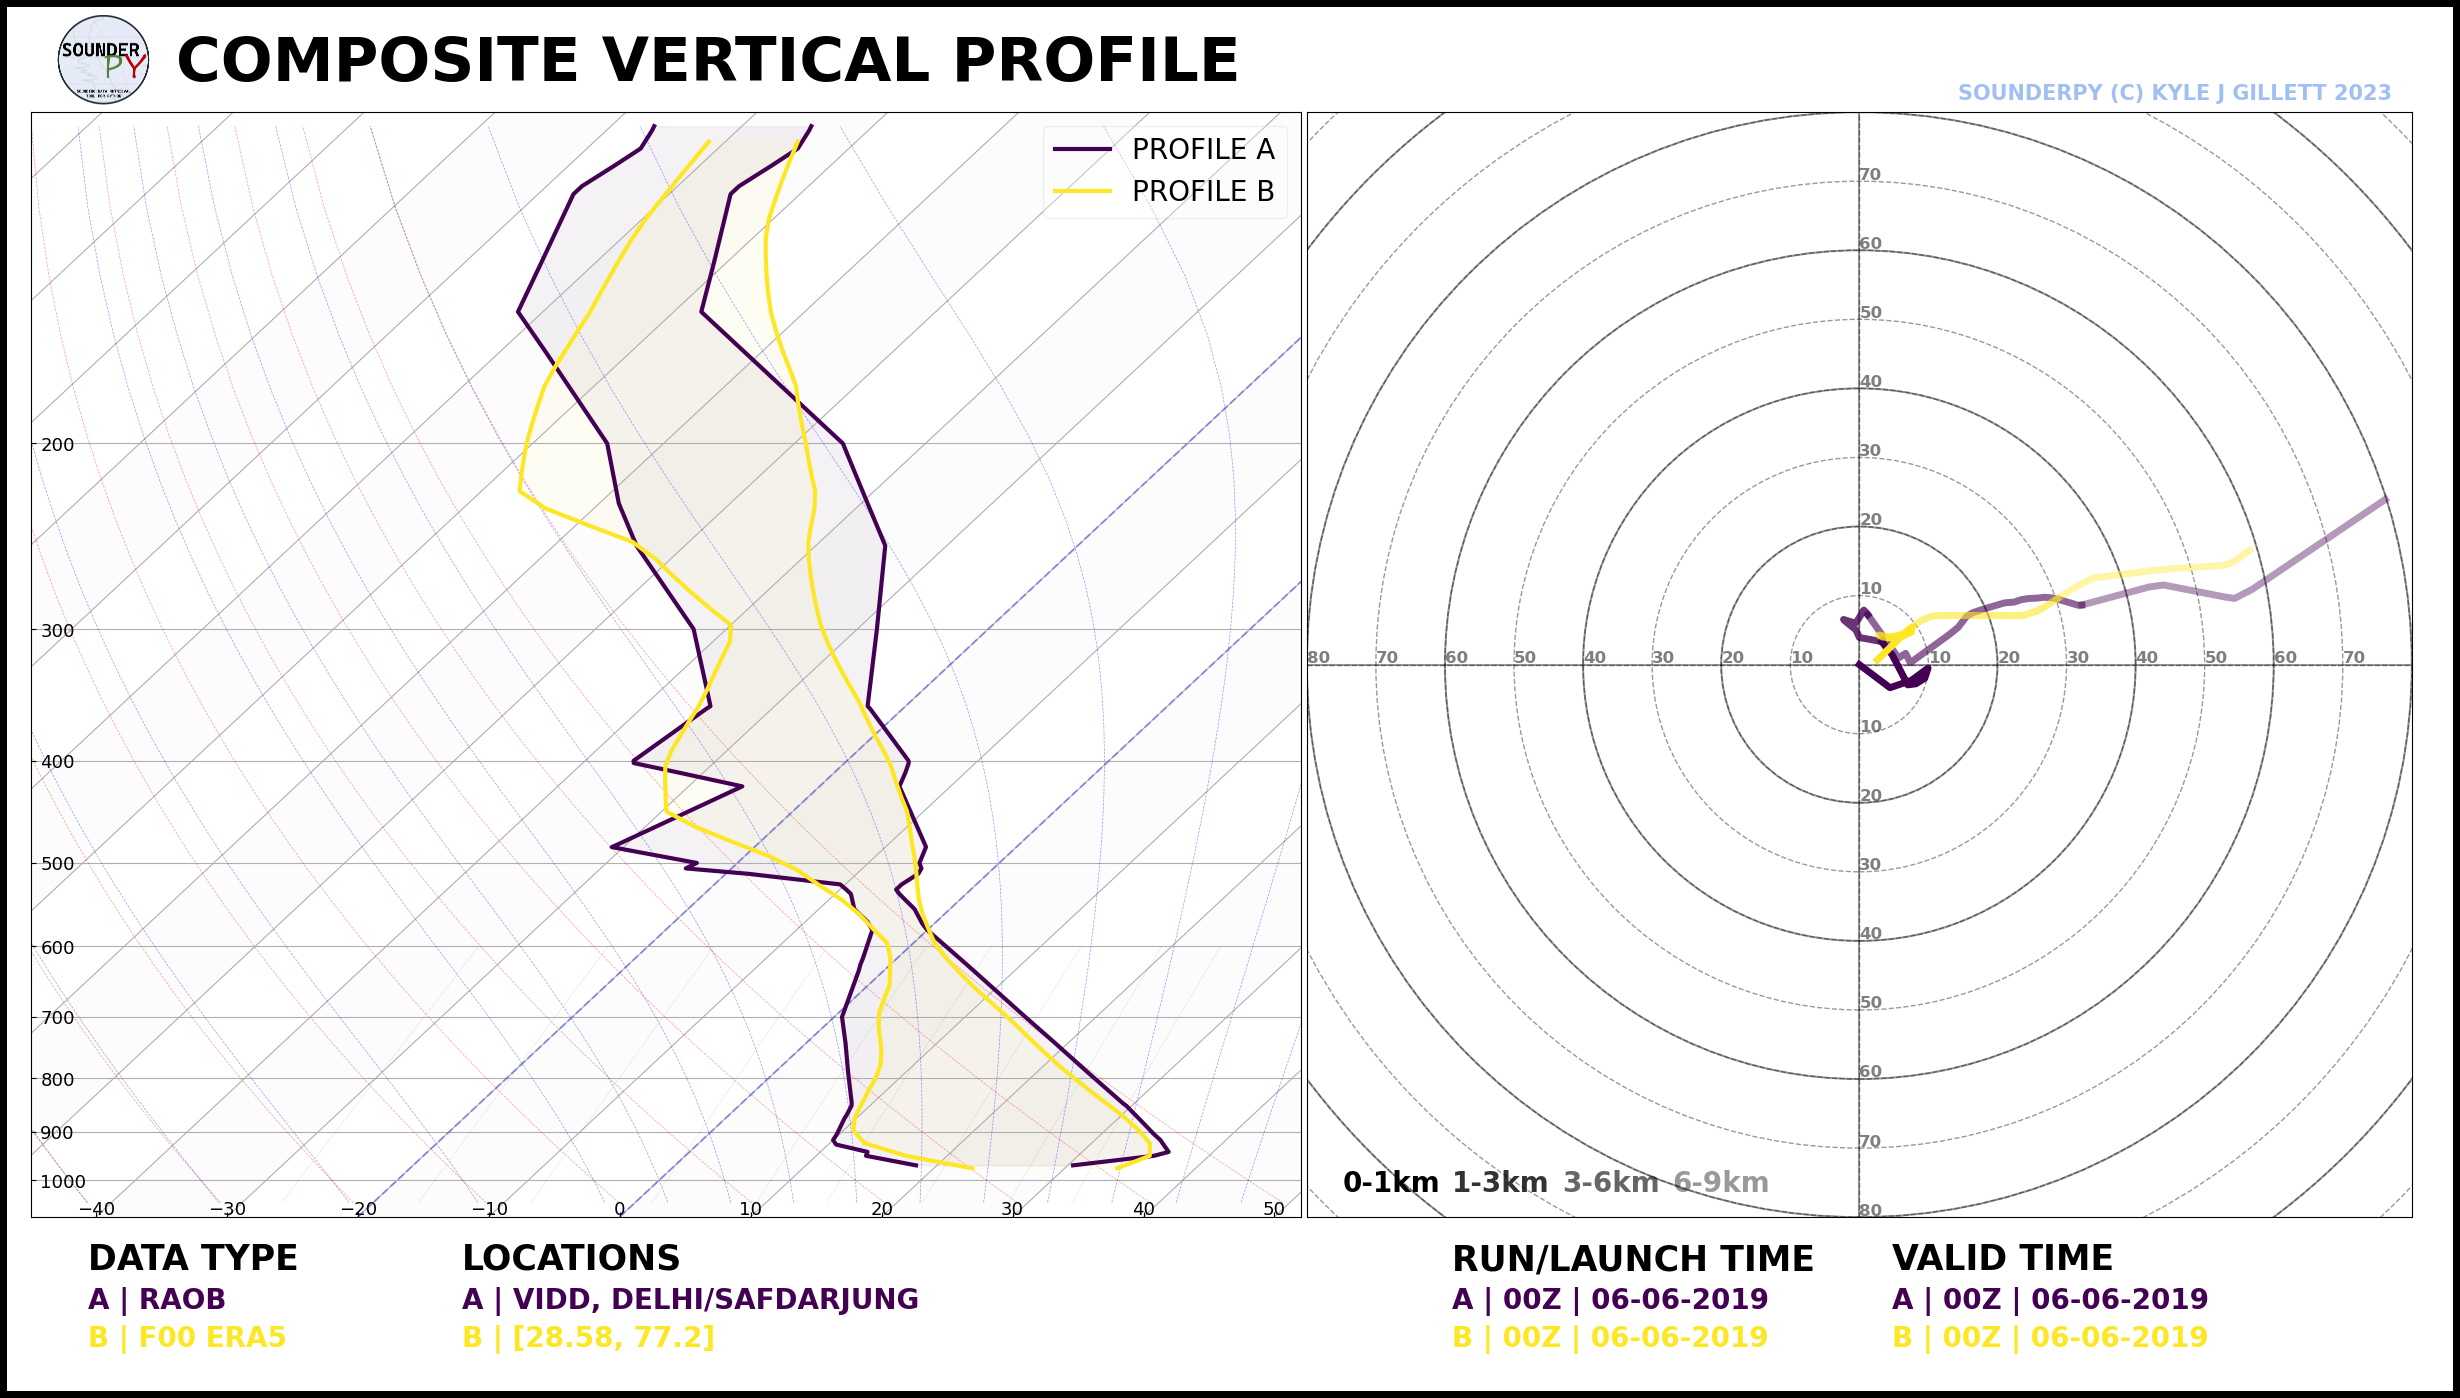

In [15]:
data_list = [clean_data, era5]

# now we can build our composite with just this to start
spy.build_composite(data_list)

In [17]:
# Define site coordinates
# site_lat_lon = (30.0, -90.0)  # Replace with your actual location

# Define your time range
date = pd.Timestamp("2019-06-06")
times = pd.date_range(start=date, end=date + pd.Timedelta(hours=12), freq="1H")
times

DatetimeIndex(['2019-06-06 00:00:00', '2019-06-06 01:00:00',
               '2019-06-06 02:00:00', '2019-06-06 03:00:00',
               '2019-06-06 04:00:00', '2019-06-06 05:00:00',
               '2019-06-06 06:00:00', '2019-06-06 07:00:00',
               '2019-06-06 08:00:00', '2019-06-06 09:00:00',
               '2019-06-06 10:00:00', '2019-06-06 11:00:00',
               '2019-06-06 12:00:00'],
              dtype='datetime64[ns]', freq='h')

In [ ]:
# Dictionary to store hourly ERA5 data
era5_dict = {}

# Loop to download and store ERA5 soundings
for t in times:
    hour_str = t.strftime("%H")
    print(f"Fetching ERA5 for {t} (hour {hour_str})")
    try:
        era5_data = spy.get_model_data('era5', site_lat_lon,
                                       t.strftime('%Y'), t.strftime('%m'), t.strftime('%d'), hour_str)
        era5_dict[f"era5_{hour_str}"] = era5_data
    except Exception as e:
        print(f"Failed to fetch for hour {hour_str}: {e}")

> COMPOSITE SOUNDING FUNCTION
  -------------------------------


> COMPLETE --------
> RUNTIME: 00:00:00


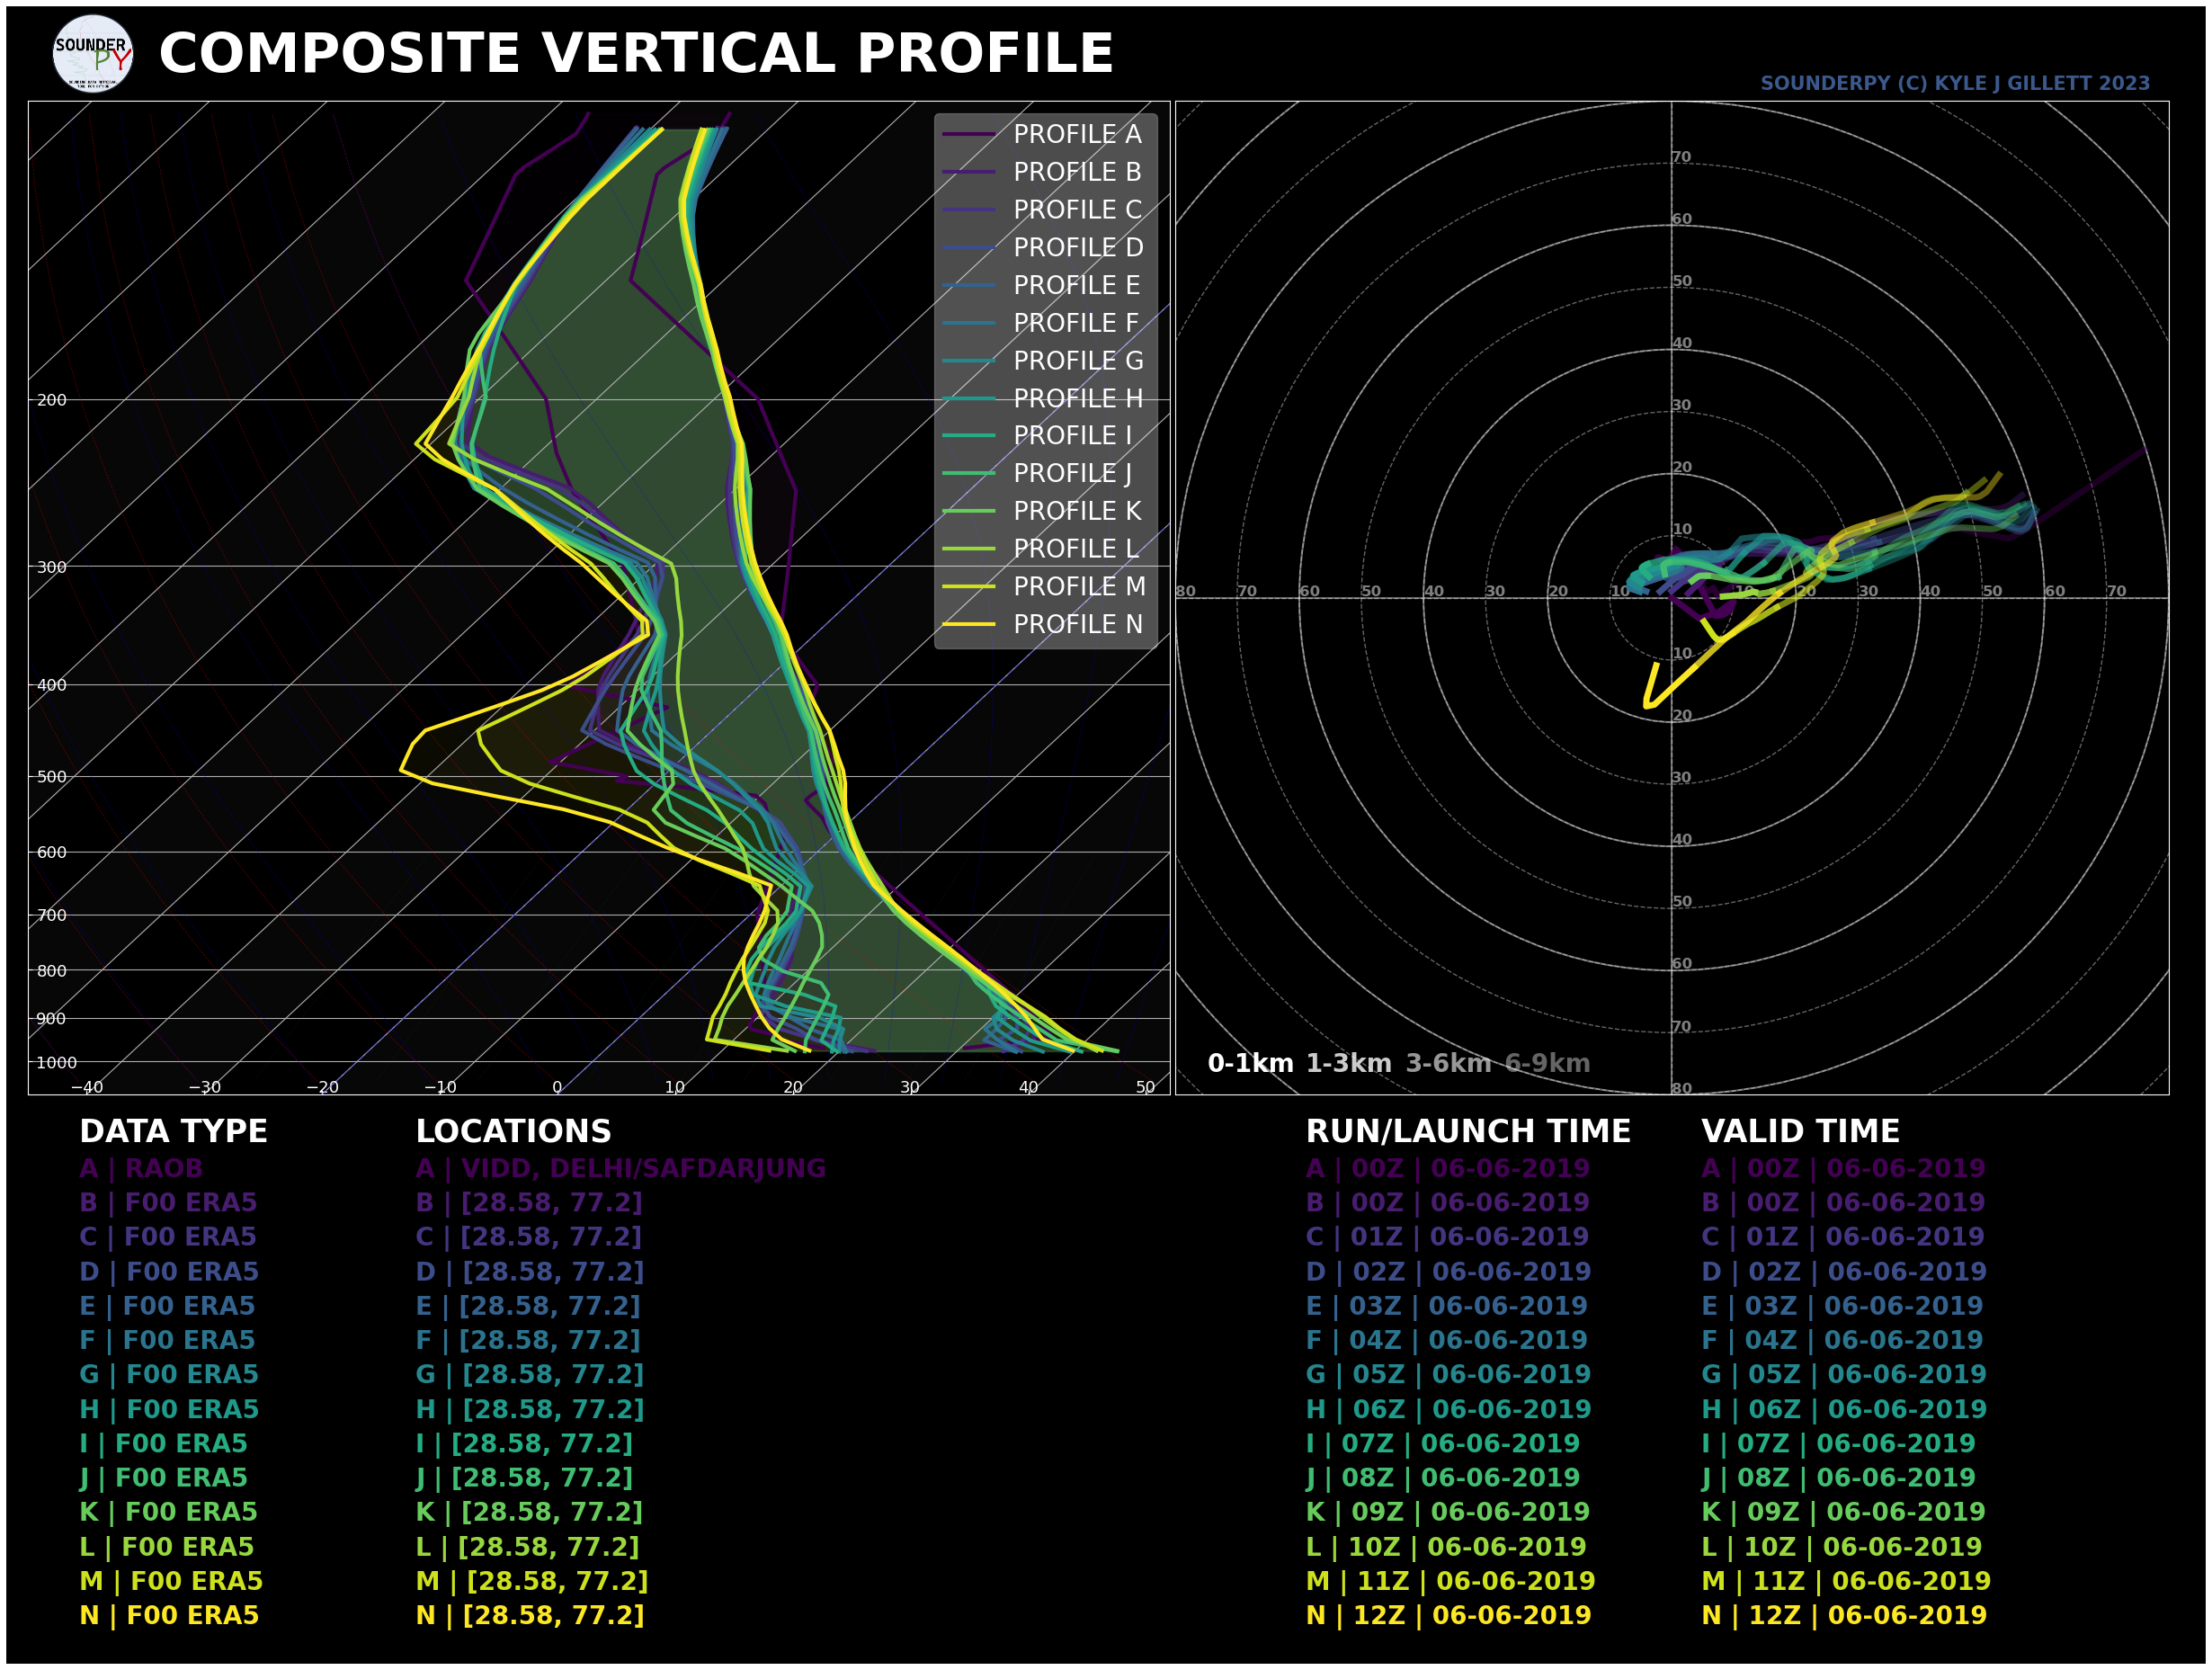

In [24]:
# Build data list with clean_data + all era5 profiles
data_list = [clean_data] + list(era5_dict.values())

# Build one composite using all soundings
spy.build_composite(data_list, dark_mode=True)

In [3]:
import os
import pyart
import numpy as np
import pandas as pd
from datetime import timedelta

abbreviations = ["None","DS","CR","LR","GR","RN","VI","WS","MH","IH/HDG"]
class_names = ["No class","dry snow","ice crystals",
               "light rain","graupel","rain",
               "vertically aligned ice","wet snow",
               "melting hail","ice hail/\nhigh density graupel"]
classifications = dict(zip(abbreviations,class_names))

In [124]:
outdir = "../Radar_Data/JUNE6TEMP"
os.makedirs(outdir, exist_ok=True)

# Step 1: Build a list of (timestamp, key) pairs from ERA5 dict
era5_profiles = []
for key, data in era5_dict.items():
    try:
        y, m, d, h = map(int, data["site_info"]["run-time"])
        era5_time = pd.Timestamp(year=y, month=m, day=d, hour=h)
        era5_profiles.append((era5_time, key))
    except Exception as e:
        print(f"Skipping {key}: {e}")

# Step 2: Loop through radar files and match with closest ERA5 profile
for file in radar_files:
    radar = pyart.io.read(file)
    radar.altitude_agl['data'] = np.ma.array(radar.altitude_agl['data'].mean())
    radar_time = pd.Timestamp(radar.time['units'].split('since ')[-1]) + pd.to_timedelta(radar.time['data'][0], unit='s')
    print(f"\nRadar file: {os.path.basename(file)} | Time: {radar_time}")

    # Find closest ERA5 time
    closest_key = min(era5_profiles, key=lambda x: abs(x[0] - radar_time))[1]
    era5 = era5_dict[closest_key]
    print(f"Using ERA5: {closest_key}")

    # Step 3: Map temperature profile to radar
    height = era5['z'].m
    temp = era5['T'].m  # Assuming it's in degrees Celsius already

    height_dict, profile_dict = pyart.retrieve.map_profile_to_gates(
        temp, height, radar, profile_field='TEMP'
    )
    profile_dict.update({
        "units": "degrees Celsius",
        "long_name": "Temperature",
        "standard_name": "air_temperature"
    })

    radar.add_field('temperature', profile_dict, replace_existing=True)
    radar.add_field('height', height_dict, replace_existing=True)
    
    # This loop adds the hydrometeoro class field to each radar object.
    hydro_dict = pyart.retrieve.hydroclass_semisupervised(radar,
                    mass_centers = pyart.retrieve.echo_class._get_mass_centers(9.41e9),
                                                          refl_field='DBZ',
                                                          zdr_field='ZDR',
                                                          kdp_field='KDP',
                                                          rhv_field='RHOHV')
    # Mask on SNR > 2 dB; classifying empty gates doesn't make much sense.
    hydro_dict["data"] = np.ma.masked_array(data = hydro_dict['hydro']['data'],
                                            mask = radar.fields["SQI"]["data"].data<0)

    hydro_dict["units"] = "Class"
    hydro_dict["classifications"] = classifications
    radar.add_field('hydroclass', hydro_dict['hydro'], replace_existing = True)

    # Save updated radar file
    output_path = os.path.join(outdir, os.path.basename(file))
    pyart.io.write_cfradial(output_path, radar)
#     break


Radar file: 20190606_000229.nc | Time: 2019-06-06 00:02:52
Using ERA5: era5_00

Radar file: 20190606_001234.nc | Time: 2019-06-06 00:12:53
Using ERA5: era5_00

Radar file: 20190606_002230.nc | Time: 2019-06-06 00:23:01
Using ERA5: era5_00

Radar file: 20190606_003230.nc | Time: 2019-06-06 00:32:38
Using ERA5: era5_01

Radar file: 20190606_004234.nc | Time: 2019-06-06 00:42:37
Using ERA5: era5_01

Radar file: 20190606_005229.nc | Time: 2019-06-06 00:52:45
Using ERA5: era5_01

Radar file: 20190606_010229.nc | Time: 2019-06-06 01:02:57
Using ERA5: era5_01

Radar file: 20190606_011233.nc | Time: 2019-06-06 01:12:58
Using ERA5: era5_01

Radar file: 20190606_012230.nc | Time: 2019-06-06 01:22:31
Using ERA5: era5_01

Radar file: 20190606_013229.nc | Time: 2019-06-06 01:32:43
Using ERA5: era5_02

Radar file: 20190606_014233.nc | Time: 2019-06-06 01:42:44
Using ERA5: era5_02

Radar file: 20190606_015230.nc | Time: 2019-06-06 01:52:53
Using ERA5: era5_02

Radar file: 20190606_020229.nc | Time: 

In [114]:
vol = xd.io.open_cfradial1_datatree("../Radar_Data/JUNE6TEMP/20190606_000229.nc")
vol = vol.xradar.georeference()

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import xarray as xr

# Define abbreviations and labels
abbreviations = ["None", "DS", "CR", "LR", "GR", "RN", "VI", "WS", "MH", "IH/HDG"]
class_names = ["No class", "dry snow", "ice crystals",
               "light rain", "graupel", "rain",
               "vertically aligned ice", "wet snow",
               "melting hail", "ice hail/\nhigh density graupel"]
classifications = dict(zip(abbreviations, class_names))

# Set colormap and boundaries
cmap = plt.get_cmap('tab10', len(class_names))
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, len(class_names)+0.5, 1), ncolors=len(class_names))

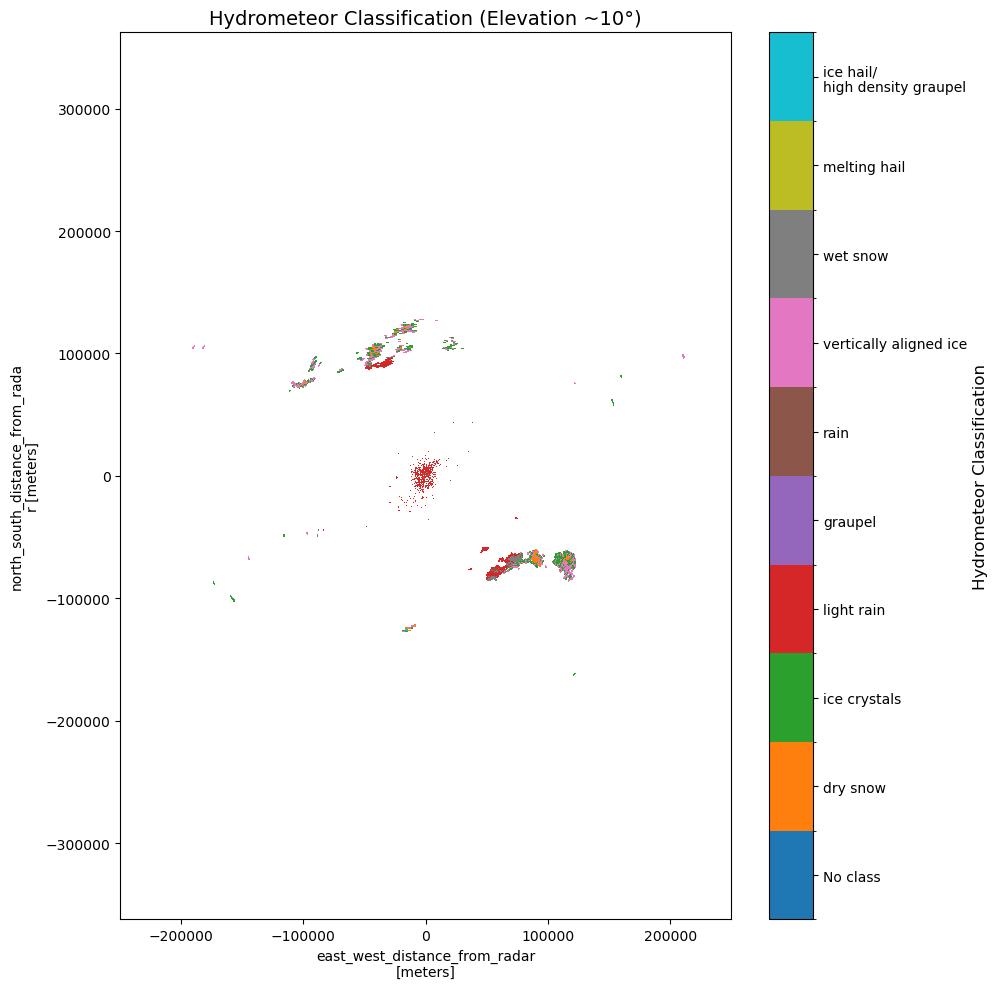

In [308]:
# Select the variable to plot
hydro = vol['sweep_2']['hydroclass']

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))
im = hydro.plot(
    x='x', y='y',
    cmap=cmap,
    norm=norm,
    ax=ax,
    add_colorbar=False  # We'll add our own
)

# Add labeled colorbar
cbar = plt.colorbar(im, ax=ax, ticks=np.arange(len(class_names)))
cbar.ax.set_yticklabels(class_names)
cbar.set_label("Hydrometeor Classification", fontsize=12)

# Optional: Add range rings or other map features
# ax.plot(...) or cartopy features etc.

ax.set_title("Hydrometeor Classification (Elevation ~10°)", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [147]:
files = sorted(glob.glob("../Radar_Data/JUNE6TEMP/*"))
# files

In [137]:
qvp = pyart.retrieve.quasi_vertical_profile(radar)

[16.001587   21.000366    0.49987793  0.99975586 21.000366  ]
20.983887


In [202]:
import xarray as xr
import pyart
from datetime import datetime

def run_qvp(radar_file_path):
    """Generate quasi-vertical profile and return as xarray.Dataset with proper data variables"""

    radar = pyart.io.read(radar_file_path)
    ds = xr.open_dataset(radar_file_path)
    time = ds.time.min()
#     print(time)
    # Generate QVP
    qvp = pyart.retrieve.quasi_vertical_profile(radar)

    # Create dataset with height coordinate
    dataset = xr.Dataset(coords={"height": qvp["height"], "time": time})

    # Add each field as a data variable
    for key in qvp.keys():
        if key not in ["height", "time", "range"]:
            dataset[key] = (("height",), qvp[key])
    
    return dataset

In [203]:
data = run_qvp(files[0])

<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T00:02:29.000000000', dtype='datetime64[ns]')
[ 0.49987793  0.99975586  1.9995117   2.9992676   4.4989014   5.998535
  8.997803   12.002563   16.001587   21.000366  ]
20.983887


In [208]:
qvps = []
for file in files:
    data = run_qvp(file)
    qvps.append(data)

<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T00:02:29.000000000', dtype='datetime64[ns]')
[ 0.49987793  0.99975586  1.9995117   2.9992676   4.4989014   5.998535
  8.997803   12.002563   16.001587   21.000366  ]
20.983887
<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T00:12:34.000000000', dtype='datetime64[ns]')
[ 0.49987793  0.99975586  1.9995117   2.9992676   4.4989014   5.998535
  8.997803   12.002563   16.001587   21.000366  ]
20.983887
<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T00:22:30.000000000', dtype='datetime64[ns]')
[ 0.49987793  0.99975586  1.9995117   2.9992676   4.4989014   5.998535
  8.997803   12.002563   16.001587   21.000366  ]
20.983887
<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T00:32:30.000000000', dtype='datetime64[ns]')
[ 0.49987793  0.99975586  1.9995117   2.9992676   4.4989014   5.998535
  8.997803   12.002563   16.001587   21.000366  ]
20.983887
<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T00:42:34.0000000

<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T06:07:25.000000000', dtype='datetime64[ns]')
[16.001587   21.000366    0.49987793  0.99975586  1.9995117   2.9992676
  4.4989014   5.998535    8.997803   12.002563  ]
11.99707
<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T06:17:30.000000000', dtype='datetime64[ns]')
[16.001587   21.000366    0.49987793  0.99975586  1.9995117   2.9992676
  4.4989014   5.998535    8.997803   12.002563  ]
11.99707
<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T06:27:25.000000000', dtype='datetime64[ns]')
[16.001587   21.000366    0.49987793  0.99975586  1.9995117   2.9992676
  4.4989014   5.998535    8.997803   12.002563  ]
11.99707
<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T06:37:25.000000000', dtype='datetime64[ns]')
[16.001587   21.000366    0.49987793  0.99975586  1.9995117   2.9992676
  4.4989014   5.998535    8.997803   12.002563  ]
11.99707
<xarray.DataArray 'time' ()> Size: 8B
array('2019-06-06T06:47:29.0000000

In [210]:
ds = xr.concat(qvps, dim='time')

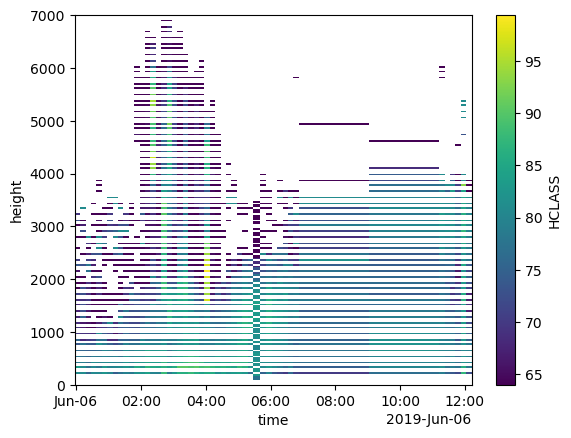

In [219]:
ds.sortby('time')['HCLASS'].plot(y='height', ylim=(0, 7e3))

In [239]:
def compute_qvp(ds, min_thresh = {"RHOHV":0.7, "TH":0, "ZDR":-1} , output_count=False):
    """
    Computes QVP by doing the azimuthal median from the values of an
    xarray Dataset, thresholded by min_thresh.

    Parameter
    ---------
    ds : xarray.Dataset
            Dataset
    min_thresh : dict
            dictionary where the keys are variable names and the values are
            the minimum values of each variable, for thresholding.
    output_count : bool
            If True, output a second dataset with the counts of valid values that
            went into the QVP calculation.
    Return
    ------
    ds_qvp : xarray.Dataset
        Dataset with the thresholded data reduced to a QVP with dim z (and time if available)
    ds_qvp_count : xarray.Dataset, optional
        Dataset with the counts of valid values that went into the QVP calculation.
    """
    # Georeference if not
    if "z" not in ds:
        ds = ds.xradar.georeference()

    # Create a combined filter mask for all conditions in the dictionary
    combined_mask = None
    for var_name, threshold in min_thresh.items():
        if var_name in ds:
            if ds[var_name].count().compute() == 0:
                # if all values are NaN, skip this variable
                continue
            condition = ds[var_name] > threshold
            if combined_mask is None:
                combined_mask = condition.compute()
            else:
                combined_mask &= condition.compute()

    ds_qvp = ds.where(combined_mask).median("azimuth", keep_attrs=True)

    # assign coord z
    ds_qvp = ds_qvp.assign_coords({"z": ds["z"].median("azimuth", keep_attrs=True)})

    try:
        ds_qvp = ds_qvp.swap_dims({"range":"z"}) # swap range dimension for height
    except ValueError:
        warnings.warn("compute_qvp: Unable to swap range and z dimensions")

    if output_count:
        ds_qvp_count = ds.where(combined_mask).count("azimuth", keep_attrs=True)

        # assign coord z
        ds_qvp_count = ds_qvp_count.assign_coords({"z": ds["z"].median("azimuth", keep_attrs=True)})

        try:
            ds_qvp_count = ds_qvp_count.swap_dims({"range":"z"}) # swap range dimension for height
        except ValueError:
            None
        return ds_qvp, ds_qvp_count

    else:
        return ds_qvp

In [290]:
# Sweep 7 should be the 12 deg elevation
# ds = xd.io.open_cfradial1_datatree(files[0])

In [313]:
dss=[]
for file in files:
    ds = xd.io.open_cfradial1_datatree(file)
    if not ds.match("sweep_4"):
        continue
    swp8 = ds['sweep_4'].to_dataset()
    ds_qvp, ds_qvp_count = compute_qvp(swp8, output_count=True)
    ds_qvp = ds_qvp.assign_coords({'time':swp8.time.mean()})
    dss.append(ds_qvp)

In [314]:
ds = xr.concat(dss, 'time')

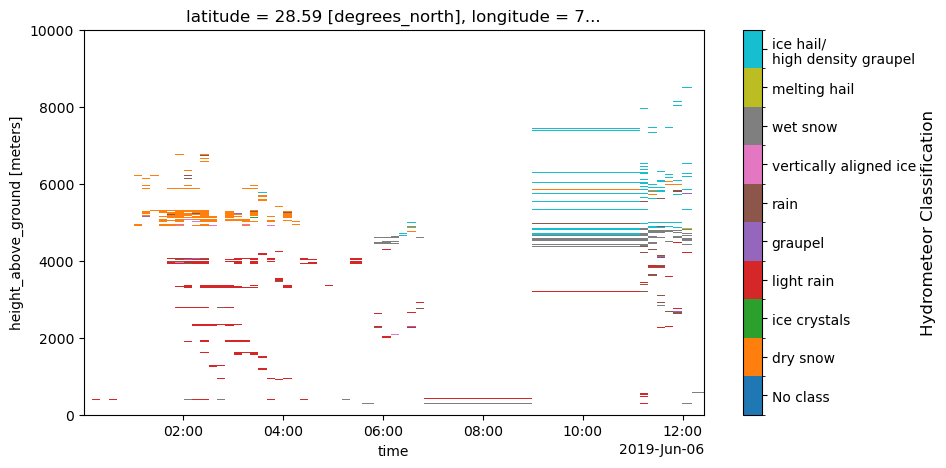

In [315]:



# Set colormap and boundaries
cmap = plt.get_cmap('tab10', len(class_names))
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, len(class_names)+0.5, 1), ncolors=len(class_names))

# Select the variable to plot
hydro = ds.sortby('time')['hydroclass']
# Create plot
fig, ax = plt.subplots(figsize=(10, 5))
im = hydro.plot(
    y='z',
    cmap=cmap,
    norm=norm,
    ax=ax,
    ylim=(0, 10e3),
    add_colorbar=False  # We'll add our own
)

# Add labeled colorbar
cbar = plt.colorbar(im, ax=ax, ticks=np.arange(len(class_names)))
cbar.ax.set_yticklabels(class_names)
cbar.set_label("Hydrometeor Classification", fontsize=12)

In [327]:
def grid_radar(radar):
    # exclude masked gates from the gridding
    gatefilter = pyart.filters.GateFilter(radar)
    gatefilter.exclude_transition()

    # perform Cartesian mapping, limit to the reflectivity field.
    grid = pyart.map.grid_from_radars(
        (radar,),
        gatefilters=(gatefilter,),
        grid_shape=(36, 401, 401),
        grid_limits=((0, 9000), (-200000.0, 200000.0), (-200000.0, 200000.0)),
        fields=radar.fields.keys(),
    )
    return grid.to_xarray()

In [328]:
dss=[]
for file in files:
    radar = pyart.io.read(file)
    grid = grid_radar(radar)
    dss.append(grid)

In [329]:
dss = xr.concat(dss, dim='time')

In [336]:
# dss.to_netcdf("../Radar_Data/GRID_WITH_HC.nc")

In [5]:
dss = xr.open_dataset("../Radar_Data/GRID_WITH_HC.nc")

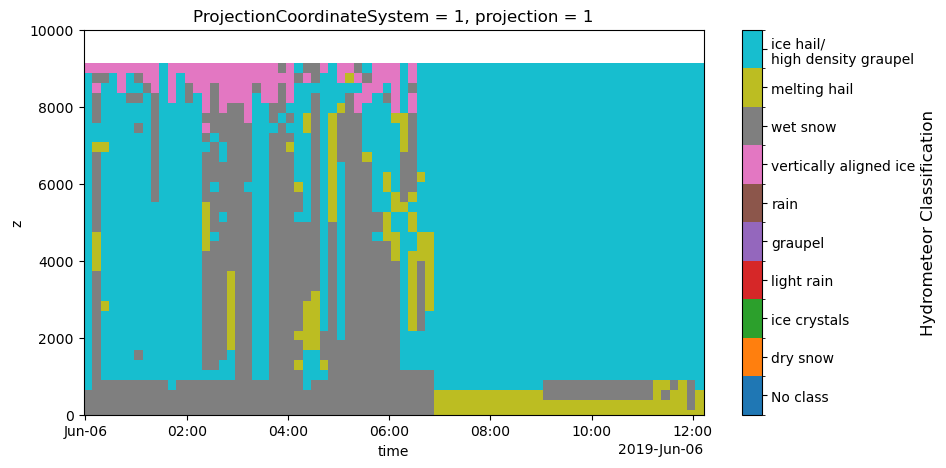

In [7]:
# dss.sortby('time')['hydroclass'].max(['x', 'y']).plot(y='z')



# Set colormap and boundaries
cmap = plt.get_cmap('tab10', len(class_names))
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, len(class_names)+0.5, 1), ncolors=len(class_names))

# Select the variable to plot
hydro = dss.sortby('time')['hydroclass'].max(['x', 'y'])
# Create plot
fig, ax = plt.subplots(figsize=(10, 5))
im = hydro.plot(
    y='z',
    cmap=cmap,
    norm=norm,
    ax=ax,
    ylim=(0, 10e3),
    add_colorbar=False  # We'll add our own
)

# Add labeled colorbar
cbar = plt.colorbar(im, ax=ax, ticks=np.arange(len(class_names)))
cbar.ax.set_yticklabels(class_names)
cbar.set_label("Hydrometeor Classification", fontsize=12)